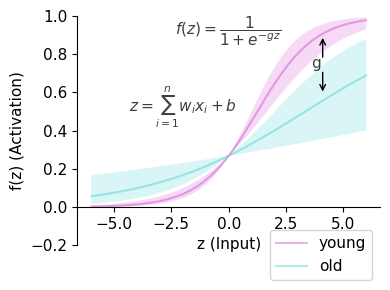

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function with a slope parameter
def sigmoid(x, g, b=-1):
    return 1 / (1 + np.exp(-(g*x+b)))

# Generate some data
x = np.linspace(-6, 6, 100)

# Set the slope parameter
g_old = [0.1, 0.3,0.5]
g_young = [0.6, 0.8, 1]

# Compute the sigmoid function with the slope parameter
young_min = sigmoid(x, g_young[0])
young_mean = sigmoid(x, g_young[1])
young_max = sigmoid(x, g_young[2])
old_min = sigmoid(x, g_old[0])
old_mean = sigmoid(x, g_old[1])
old_max = sigmoid(x, g_old[2])

# Plot the sigmoid function with the slope parameter
sigmoid(0, g_young[0])

fig, ax = plt.subplots(tight_layout=True,figsize=(4,3))
ax.plot(x, young_mean, color = 'm', alpha=.3, label='young')
ax.fill_between(x, young_min, young_max, facecolor='m', alpha = .15, interpolate=True)
ax.plot(x, old_mean, color = 'c', alpha=.3, label='old')
ax.fill_between(x, old_min, old_max, facecolor='c', alpha = .15, interpolate=True)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('f(z) (Activation)',fontsize=11)
ax.set_xlabel('z (Input)',fontsize=11)
ax.set_ylim([-.2,1])
ax.tick_params(axis='both', which='major', labelsize=11)
ax.text(x=0,y=0.9,s=r'$f(z) =  \dfrac{1}{1 + e^{-gz}}$', alpha=.75, horizontalalignment='center', fontsize=11)
ax.text(x=-2,y=0.5,s=r'$z=\sum_{i=1}^{n}{w_ix_i+b}$', alpha=.75, horizontalalignment='center',fontsize=11)
ax.text(x=3.8,y=0.75,s='g', alpha=.75, horizontalalignment='center',verticalalignment='center',fontsize=11)
ax.annotate("", xy=(4.1, 0.9), xytext=(4.1, 0.77),
            arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(4.1, 0.59), xytext=(4.1, 0.72),
            arrowprops=dict(arrowstyle="->"))
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.1),fontsize=11)
fig.savefig('../figures/dedifferentiation1.svg')

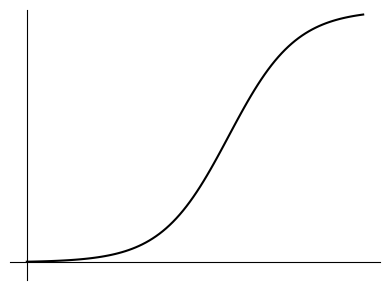

In [29]:
x = np.linspace(-10, 10, 100)
fig, ax = plt.subplots(tight_layout=True,figsize=(4,3))
ax.plot(x, sigmoid(x,0.5), color = 'k')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', -10))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylim([-.07,1])
ax.set_xlim([-11,11])
ax.set_yticks([])
ax.set_xticks([])
fig.savefig('../figures/dedifferentiation2.svg')

(0.25, 1.0)

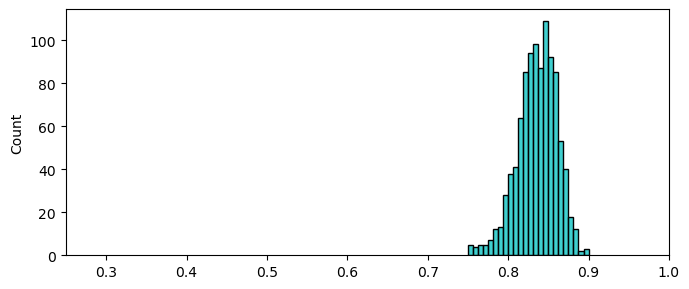

In [72]:
import numpy as np 
from scipy.stats import beta, skewnorm
import seaborn as sns
a = 1.5
b = 6 
x = beta.rvs(a,b,size=1000)

def transform(x,skewness):
    return skewnorm.ppf(x, a=skewness)

skewness = -50
y = transform(x,skewness)
mean = 0.8
max_v = 0.9
min_v = 0.75

y = y - np.mean(y) + mean
y = (y-np.min(y))/(np.max(y)-np.min(y))
y = y*(max_v-min_v) + min_v

ig, ax = plt.subplots(tight_layout=True,figsize=(7,3))
sns.histplot(y,color='c')
ax.set_xlim([0.25,1])

